<a href="https://colab.research.google.com/github/jvaug30/Water-Potability/blob/main/Water_Potability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/00 Data/02 Stack Two/Week 08/Water Potability.csv')
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890456,20791.31898,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.05786,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.54173,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.41744,8.059332,356.886136,363.266516,18.436525,100.341674,4.628771,0
4,9.092223,181.101509,17978.98634,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isna().any()

ph                  True
Hardness           False
Solids             False
Chloramines        False
Sulfate             True
Conductivity       False
Organic_carbon     False
Trihalomethanes     True
Turbidity          False
Potability         False
dtype: bool

In [ ]:
mean_values = df[['ph', 'Sulfate', 'Trihalomethanes']].mean()
print(mean_values)

ph                   7.080795
Sulfate            333.775777
Trihalomethanes     66.396293
dtype: float64


In [ ]:
df[['ph',
    'Sulfate',
    'Trihalomethanes']] = df[['ph',
                              'Sulfate',
                              'Trihalomethanes']].fillna(df[['ph', 'Sulfate',
                                                             'Trihalomethanes']].mean())

In [ ]:
df.isna().any()

ph                 False
Hardness           False
Solids             False
Chloramines        False
Sulfate            False
Conductivity       False
Organic_carbon     False
Trihalomethanes    False
Turbidity          False
Potability         False
dtype: bool

In [ ]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.469956,32.879761,8768.570828,1.583085,36.142612,80.824064,3.308162,15.769881,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.277673,176.850538,15666.690300,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711,0.000000
50%,7.080795,196.967627,20927.833605,7.130299,333.775777,421.884968,14.218338,66.396293,3.955028,0.000000
75%,7.870050,216.667456,27332.762125,8.114887,350.385756,481.792305,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196010,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [ ]:
df['Solids'].value_counts()

20791.31898    1
15979.33479    1
37000.95567    1
18736.19090    1
12289.90092    1
              ..
22824.69947    1
21809.70983    1
45141.68604    1
17037.72537    1
17404.17706    1
Name: Solids, Length: 3276, dtype: int64

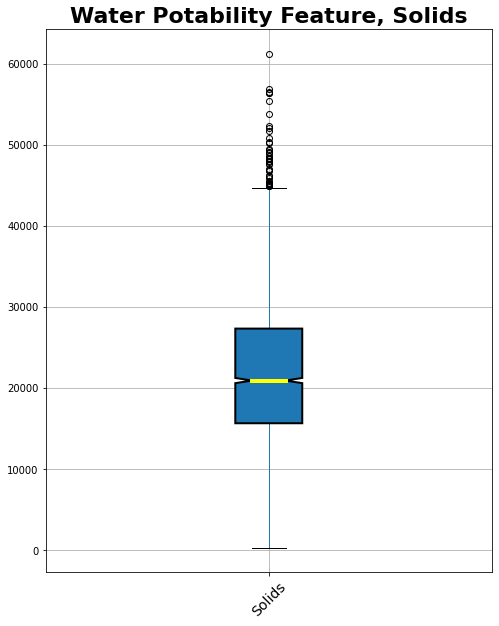

In [ ]:
plt.figure(figsize=(8,10))
df.boxplot(column=['Solids'],
           notch=True,
           patch_artist=True,
           medianprops = dict(linestyle='-', linewidth=4, color='Yellow'),
           boxprops = dict(linestyle='-', linewidth=2, color='k'))
plt.xticks(rotation=45, fontsize=14)
plt.title('Water Potability Feature, Solids', fontsize=22, weight='bold');

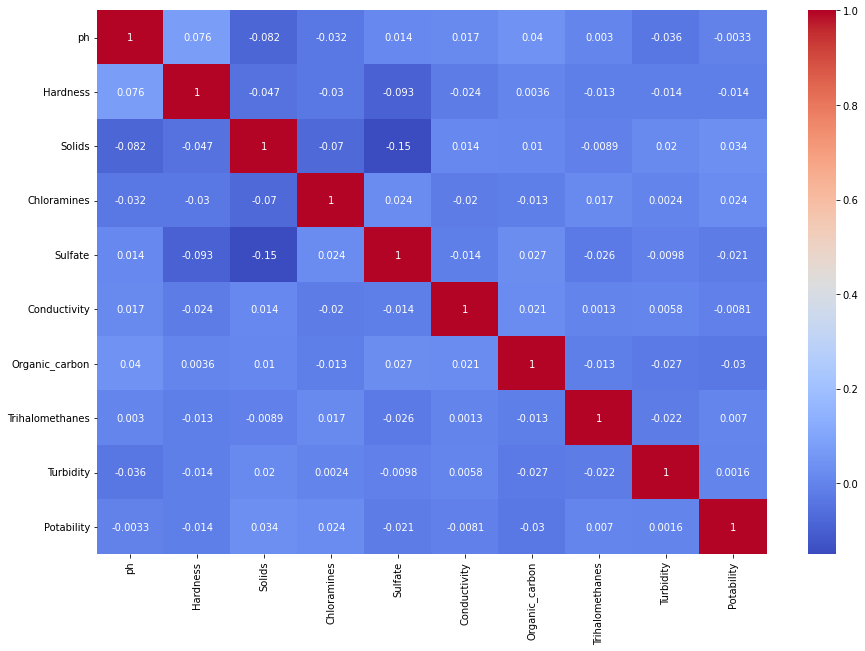

In [ ]:
corr = df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, cmap='coolwarm', annot=True);

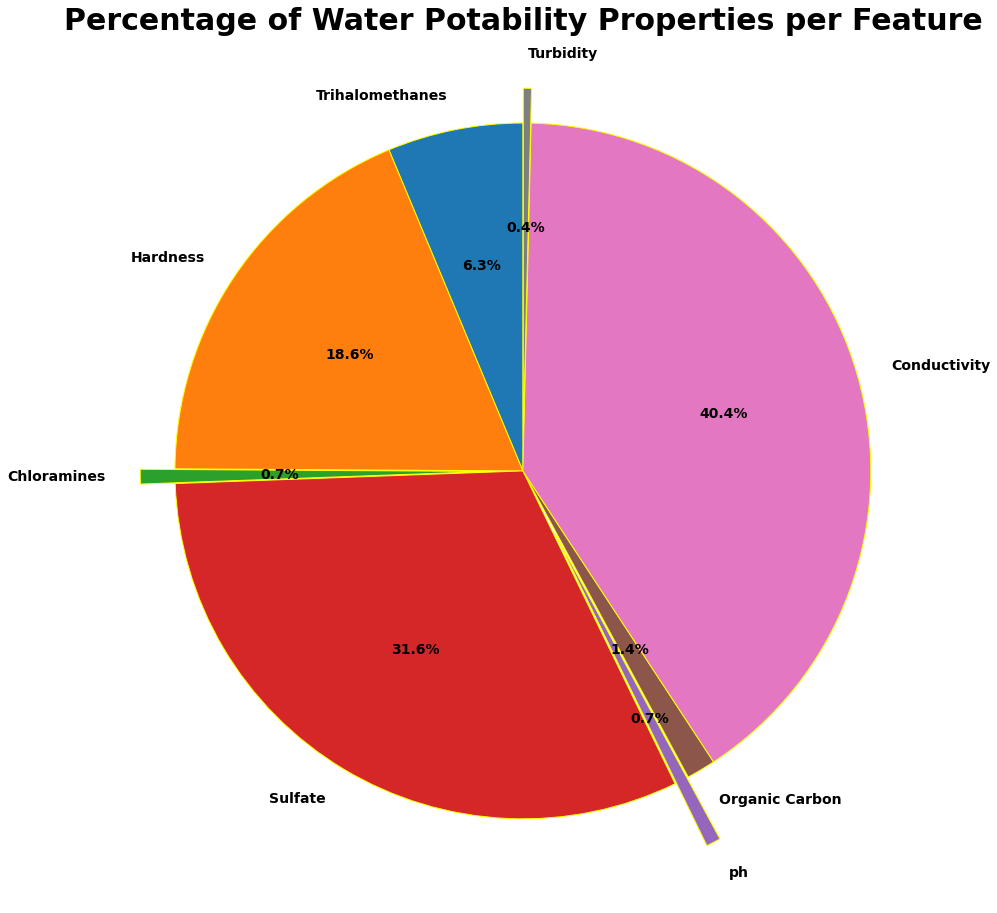

In [ ]:
# https://matplotlib.org/stable/gallery/pie_and_polar_charts/pie_features.html
# https://www.geeksforgeeks.org/plot-a-pie-chart-in-python-using-matplotlib/
# https://www.geeksforgeeks.org/how-to-use-color-palettes-in-python-bokeh/

df_ph = df['ph'].sum()
df_Hardness = df['Hardness'].sum()
df_Chloramines = df['Chloramines'].sum()
df_Sulfate = df['Sulfate'].sum()
df_Conductivity = df['Conductivity'].sum()
df_Organic_carbon = df['Organic_carbon'].sum()
df_Trihalomethanes = df['Trihalomethanes'].sum()
df_Turbidity = df['Turbidity'].sum()

df_Total_Score = (df_ph + df_Hardness + df_Chloramines + df_Sulfate +
                  df_Conductivity + df_Organic_carbon +
                  df_Trihalomethanes + df_Turbidity)

df_Properties = ['Trihalomethanes', 'Hardness', 'Chloramines', 'Sulfate', 'ph',
                 'Organic Carbon', 'Conductivity', 'Turbidity']
pct = (df_Trihalomethanes/df_Total_Score, df_Hardness/df_Total_Score,
       df_Chloramines/df_Total_Score, df_Sulfate/df_Total_Score, df_ph/df_Total_Score,
       df_Organic_carbon/df_Total_Score, df_Conductivity/df_Total_Score,
       df_Turbidity/df_Total_Score)

pct
explode = (0.0, 0.0, 0.1, 0.0, 0.2, 0.0, 0.0, 0.1)
wp = {'linewidth' : 1, 'edgecolor' : 'yellow',}
def func(pct):
  absolute = int(pct)
  return '{:.1f}%'.format(pct, absolute)
fig, axes = plt.subplots(figsize=(20,16))
axes.pie(pct,
         autopct = lambda pct: func(pct),
         explode = explode,
         labels = df_Properties,
         shadow = False,
         startangle=90,
         wedgeprops = wp,
         textprops = dict(color ='k', weight= 'bold', fontsize=14));
axes.set_title('Percentage of Water Potability Properties per Feature', weight = 'bold',
               fontsize = 30);

In [ ]:
ph = df['ph'].groupby(df['Potability']).sum().round(0)
hardness = df['Hardness'].groupby(df['Potability']).sum().round(0)
solids = df['Solids'].groupby(df['Potability']).sum().round(0)
chloramines = df['Chloramines'].groupby(df['Potability']).sum().round(0)
sulfate = df['Sulfate'].groupby(df['Potability']).sum().round(0)
conductivity = df['Conductivity'].groupby(df['Potability']).sum().round(0)
organic_carbon = df['Organic_carbon'].groupby(df['Potability']).sum().round(0)
trihalomethanes = df['Trihalomethanes'].groupby(df['Potability']).sum().round(0)
turbidity = df['Turbidity'].groupby(df['Potability']).sum().round(0)
print('Ph')
print(ph)
print('\n')
print('Hardness')
print(hardness)
print('\n')
print('Solids')
print(hardness)
print('\n')
print('Chloramines')
print(chloramines)
print('\n')
print('Sulfate')
print(sulfate)
print('\n')
print('Conductivity')
print(conductivity)
print('\n')
print('Organic Carbon')
print(organic_carbon)
print('\n')
print('Trihalomethanes')
print(trihalomethanes)
print('\n')
print('Turbidity')
print(turbidity)

Ph
Potability
0    14155.0
1     9042.0
Name: ph, dtype: float64


Hardness
Potability
0    393073.0
1    250233.0
Name: Hardness, dtype: float64


Solids
Potability
0    393073.0
1    250233.0
Name: Hardness, dtype: float64


Chloramines
Potability
0    14170.0
1     9162.0
Name: Chloramines, dtype: float64


Sulfate
Potability
0    668075.0
1    425375.0
Name: Sulfate, dtype: float64


Conductivity
Potability
0    852607.0
1    543640.0
Name: Conductivity, dtype: float64


Organic Carbon
Potability
0    28700.0
1    18098.0
Name: Organic_carbon, dtype: float64


Trihalomethanes
Potability
0    132484.0
1     85030.0
Name: Trihalomethanes, dtype: float64


Turbidity
Potability
0    7924.0
1    5072.0
Name: Turbidity, dtype: float64


In [ ]:
df['Potability'].value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

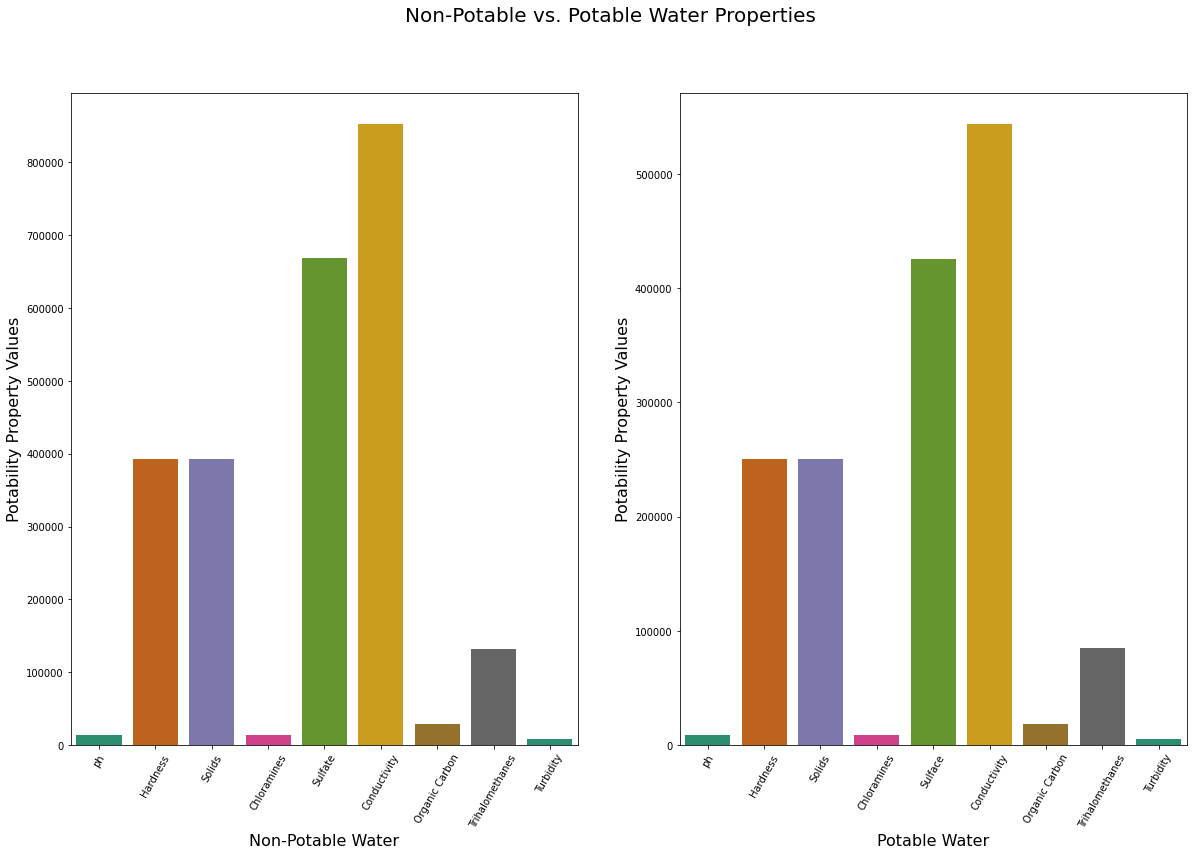

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(20,12))
axes[0] = sns.barplot(data=df, x=['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity', 'Organic Carbon', 'Trihalomethanes', 'Turbidity'],
                      y = [14155, 393073, 393073, 14170, 668074, 852607, 28699, 132484, 7923], ax=axes[0], palette='Dark2')
plt.setp(axes[0].get_xticklabels(), rotation=60)
axes[0].set_xlabel('Non-Potable Water', fontsize=16)
axes[0].set_ylabel('Potability Property Values', fontsize=16)
axes[1] = sns.barplot(data=df, x=['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulface', 'Conductivity', 'Organic Carbon', 'Trihalomethanes', 'Turbidity'],
                      y = [9041, 250233, 250233, 9162, 425374, 543640, 18097, 85029, 5071], ax=axes[1], palette='Dark2')
plt.setp(axes[1].get_xticklabels(), rotation=60)
axes[1].set_xlabel('Potable Water', fontsize=16)
axes[1].set_ylabel('Potability Property Values', fontsize=16);
fig.suptitle('Non-Potable vs. Potable Water Properties', fontsize=20);